# CWRU Bearing Data - Data Preprocessing

In [31]:
import os
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Example

In [32]:
for root, dirs, files in os.walk('.\\Data\\NormalBaselineData', topdown=False):
    for name in files:
        path = os.path.join(root, name)
        print(path)

.\Data\NormalBaselineData\Normal_0.mat
.\Data\NormalBaselineData\Normal_1.mat
.\Data\NormalBaselineData\Normal_2.mat
.\Data\NormalBaselineData\Normal_3.mat


In [33]:
path = r'.\\Data\\NormalBaselineData\\Normal_3.mat'
mat = scipy.io.loadmat(path)

print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X100_DE_time', 'X100_FE_time', 'X100RPM'])


In [34]:
mat.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 28 11:25:48 2000'), ('__version__', '1.0'), ('__globals__', []), ('X100_DE_time', array([[ 0.01460308],
       [ 0.05444862],
       [ 0.10764554],
       ...,
       [-0.02357354],
       [ 0.00521538],
       [ 0.04777292]])), ('X100_FE_time', array([[ 0.19292182],
       [ 0.16436364],
       [ 0.09081091],
       ...,
       [ 0.10930182],
       [ 0.05218545],
       [-0.00452   ]])), ('X100RPM', array([[1725]], dtype=uint16))])

In [35]:
key_name = list(mat.keys())[3]
print(key_name)

X100_DE_time


In [36]:
DE_data = mat[key_name]
print(DE_data.shape)

(485643, 1)


In [37]:
fault = np.full((len(DE_data), 1), name[:-4])
print(fault.shape)

(485643, 1)


In [38]:
df_temp = pd.DataFrame({'DE_data': np.ravel(DE_data), 'fault': np.ravel(fault)})
print(df_temp.shape)

(485643, 2)


In [ ]:
df_temp.head()

,DE_data,fault
0,0.014603,Normal_3
1,0.054449,Normal_3
2,0.107646,Normal_3
3,0.133722,Normal_3
4,0.112652,Normal_3


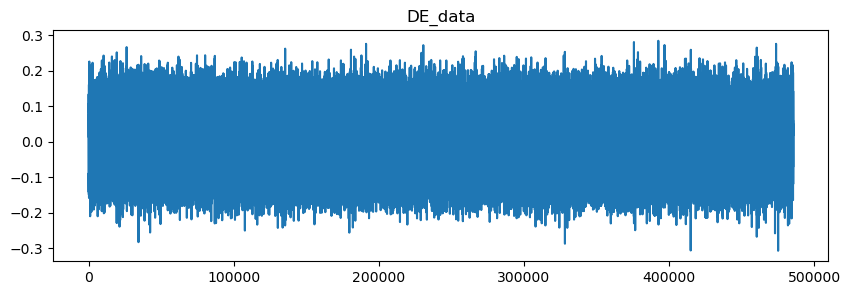

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(df_temp['DE_data'], label=name[:-4])
plt.title('Normal Drive End Data')
plt.show()